# The rules
An algorythm should be:




### Unambiguous
Algorithm should be clear and unambiguous. Each of its steps (or phases), and their inputs/outputs should be clear and must lead to only one meaning.

### Input
An algorithm should have 0 or more well-defined inputs.

### Output
An algorithm should have 1 or more well-defined outputs, and should match the desired output.

### Independent
An algorithm should have step-by-step directions, which should be independent of any programming code.


# Divide and conquer
Divide and conquer is an approach to solve problems, here is how it work:

- Split the problem into step
- Split each step into sub steps, split each sub steps into even smaller steps, until you get to only no divisible steps
- Generally, at this part, the sub problems are easy to resolve
- Merge them

# Exercises

### 1) Catch the mouse

Cat A and cat B are aiming to a mouse, given both of the distances from each cat to the mouse and the speed of each cat, find which one will catch it first

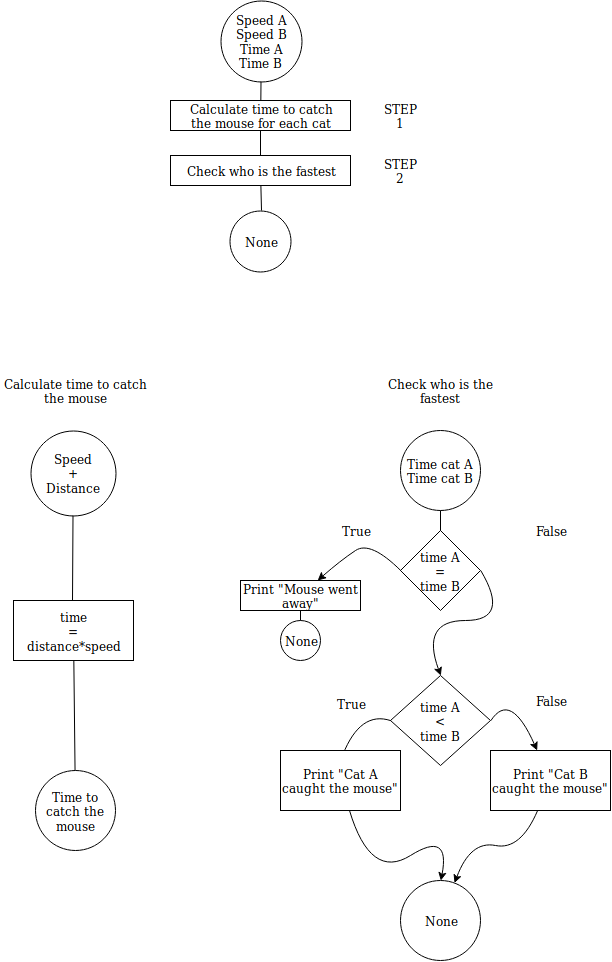

In [25]:
cat_a_speed = 20
cat_b_speed = 5
cat_a_dist  = 6
cat_b_dist  = 2
#### YOUR CODE HERE ####
def time2mouse(cat_speed, cat_distance):
    time = cat_distance/cat_speed
    return time

def fastest_cat(cat_a_time, cat_b_time):
    if cat_a_time == cat_b_time:
        print("Mouse went away")
        return
    
    if cat_a_time < cat_b_time:
        print("Cat A caught the mouse!")
    else:
        print("Cat B caught the mouse!")
    return

def first_to_catch(speed_a, speed_b, distance_a, distance_b):
    time_a = time2mouse(speed_a, distance_a)
    time_b = time2mouse(speed_b, distance_b)
    fastest_cat(time_a, time_b)
    
#### END OF YOUR CODE ####

first_to_catch(cat_a_speed, cat_a_dist, cat_b_speed, cat_b_dist)

Cat A caught the mouse!


### 2) Channel
You have some files, each filename is a number, in each file, there are instructions for the next file. And at the end, the solution.
<br><br>
<small>The file is here: www.pythonchallenge.com/pc/def/channel.zip</small>
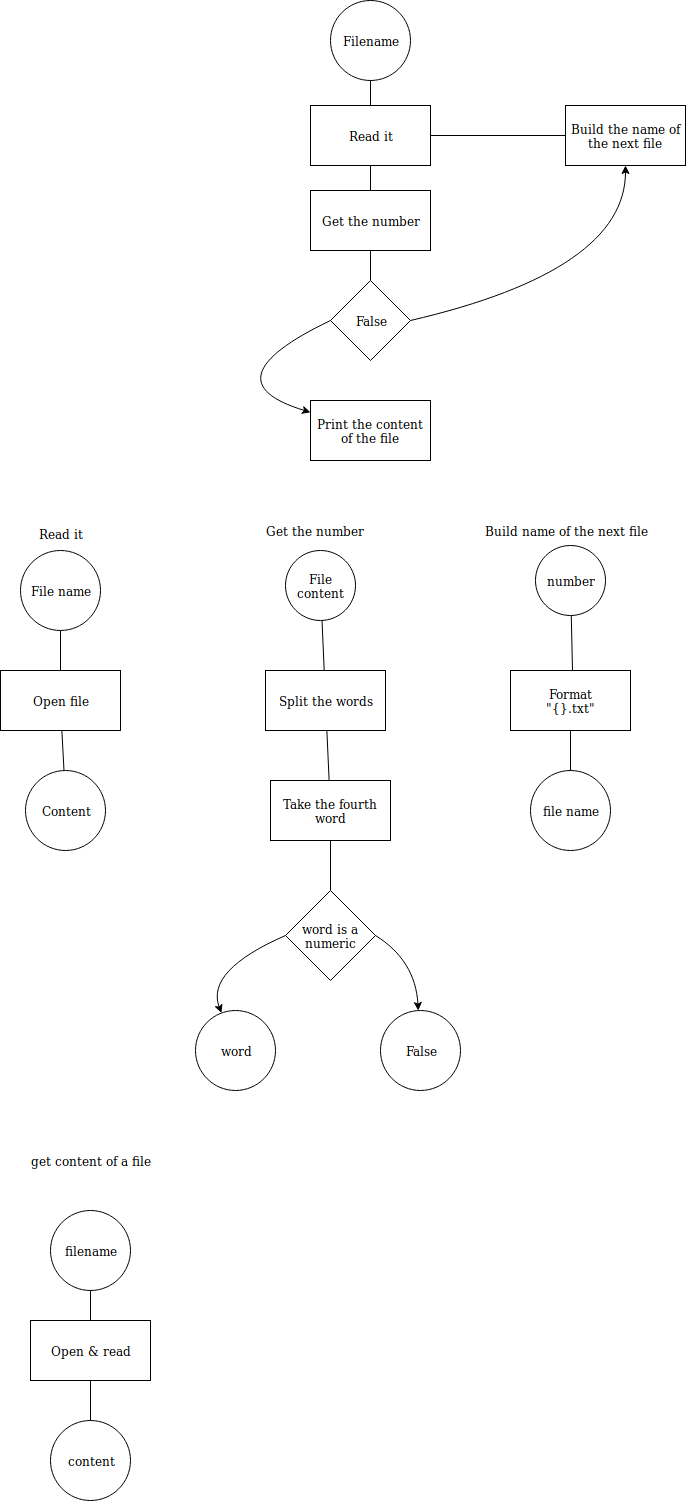

In [4]:
def get_file_content(filename):
    content = open(filename, 'r').read()
    return content

def get_hidden_nb(s):
    words = s.split(' ')
    number = words[3]
    if number.isnumeric():
        return number
    return False

def build_filename(nb):
    return "{}.txt".format(nb)

def main(filename):
    while True:
        content = get_file_content(filename)
        try:
            nb      = get_hidden_nb(content)
        except:
            nb = False
        if not nb:
            return "On file {}: {}".format(filename,content)
        nxt_filename = build_filename(nb)
        filename = nxt_filename

main("90052.txt")


'On file 46145.txt: Collect the comments.'

### 3) Cocktail generator

You have 3 files:<br>
-  A list of names
-  A list of fruits
-  A list of alcohols

With those files, you need to make a random cocktail. <Br>
A cocktail should have a name and a recipe, the recipe has 3 fruits and 1 alcohol.
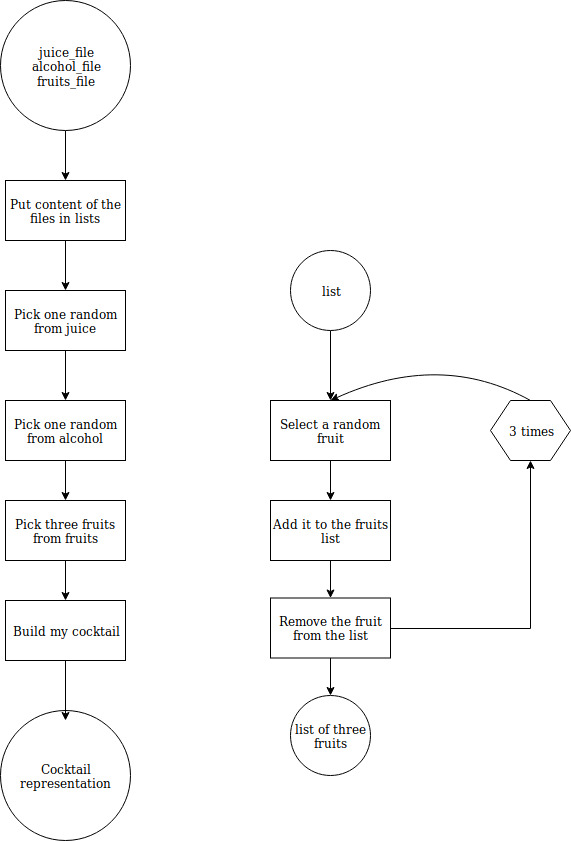

In [11]:
import random

class Cocktail:
    
    def __init__(self, name, alcohol, ingredients):
        self.name = name
        self.alcohol = alcohol
        self.ingredients = ingredients
        
    def __repr__(self):
        return "Cocktail {}, recipe {},{},{} with {}".format(self.name, 
                                                             self.ingredients[0], 
                                                             self.ingredients[1],
                                                             self.ingredients[2],
                                                             self.alcohol)

def pick_three_fruits(org_fruits_list):
    fruits_list = org_fruits_list.copy()
    recipe = []
    for i in range(3):
        random_fruit = random.choice(fruits_list)
        recipe.append(random_fruit.strip())
        fruits_list.remove(random_fruit)
    return recipe

def generate_cocktail(juices_file, alcohol_file, fruits_file):
    juices_list = open(juices_file, 'r').readlines()
    alcohol_list = open(alcohol_file, 'r').readlines()
    fruits_list = open(fruits_file, 'r').readlines()
    
    # Pick one random from juices
    juice = random.choice(juices_list).strip()
    
    # Pick one random from alcohol
    alcohol = random.choice(alcohol_list).strip()
    
    # Pick three from fruits
    recipe  = pick_three_fruits(fruits_list)
    
    cocktail = Cocktail(juice, alcohol, recipe)
    return cocktail

print(generate_cocktail('juices_names.txt', 'alcohol_names.txt', 'fruits_names.txt'))

Cocktail eritrean, recipe mango,tomatoe,watermelon with beer


### 4) Linter

Create a class that receives a python file.<br>
Create those methods:<br>
- Check if there is an open bracket in the file
- Check if every function and class definition end by a colon
- Check if every line that ends by a colon is follow by an indented line

In [26]:
class Linter:
    def __init__(self, filename):
        self.filename     = filename
        self.file_content = open(filename, 'r').read()
        self.file_lines   = open(filename, 'r').readlines()
    
    def check_open_character(self, open_char, close_char):
        if open_char == close_char:
            occurences = self.file_content.count(open_char)
            return occurences % 2 == 0
        else:
            return self.file_content.count(open_char) == self.file_content.count(close_char)
    
    def check_open_characters(self, characters): # characters is in format: [('(',')'), ('"', '"')]
        error_dict = {}
        for char in characters:
            error_dict[char] = self.check_open_character(char[0], char[1])
        return error_dict
    
    def check_colons(self):
        bad_lines = []
        keywords = ('def', 'class', 'if', 'for', 'while', 'else', 'elif', 'try', 'except', 'finally')
        line_ix = 1
        for line in self.file_lines:
            if line.strip().startswith(keywords) and not line.strip().endswith(":"):
                bad_lines.append(line_ix)
            line_ix += 1
        return bad_lines
    
    def get_line_indent(self, line):
        c = 0 
        for char in line:
            if char.isalpha():
                break
            c += 1
        return c        
        
    def check_indent(self):        
        # Init
        lines                    = self.file_lines.copy()
        colon_on_previous_line   = False                     # True if the previous line ends by a colon
        indent_trace             = 0                         # List of the chars before the line 
        indent_level             = 0                         # How many time did the user indent his lines til now
        
        line_ix = 0                                          # Index of the line
        for line in lines:
            line_ix += 1                                     # Put this at the beginning bc line starts from 1
            
            if len(line.strip()) == 0:
                continue
                
            current_indent_trace = self.get_line_indent(line) # Checking the current indentation
            
            if current_indent_trace > indent_trace:           # The line is more indented than the previous one
                if not colon_on_previous_line:                # No colon but the line is indented           
                    print("Bad indentation on line", line_ix)
                    return False
                indent_trace = current_indent_trace
                indent_level += 1
            
            elif current_indent_trace < indent_trace:         # The user unindent his code
                indent_trace = current_indent_trance
                indent_level -= 1
                
            else:                                             # No change in indentation
                if colon_on_previous_line:                    # No indentation but colon on the previous line
                    print("Bad indentation on line", line_ix)
                    return False
                
            colon_on_previous_line = False                    # Set the colon flag back to False
            
            if line.strip().endswith(":"):                    # Check if a colon is at the end of a line
                colon_on_previous_line = True
                
        print("Your file is good!")

### 5) The turtle

You need to help a turtle to find his leatuce, given a board with the position of the turtle and the position of the salad, return a list of moves that the turtle needs to do, possible moves are `Left`, `Right`, `Up`, `Down`

In [40]:
import random

board = [
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', 'T', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', 'L', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
        ] 

##### YOUR CODE HERE ####
def find_y(board, char):
    arr_ix = 0
    for arr in board:
        if char in arr:
            return arr_ix
        arr_ix += 1

def find_x(arr, char):
    return arr.index(char)

def find_turtle_coords(board):
    turtle_y = find_y(board, 'T')
    turtle_x = find_x(board[turtle_y], 'T')
    return [turtle_x, turtle_y]

def find_lettuce_coords(board):
    lettuce_y = find_y(board, 'L')
    lettuce_x = find_x(board[lettuce_y], 'L')
    return [lettuce_x, lettuce_y]

def get_difference_on_x(turtle_coords, lettuce_coords):
    turtle_x  = turtle_coords[0]
    lettuce_x = lettuce_coords[0]
    
    return lettuce_x - turtle_x
    
def get_difference_on_y(turtle_coords, lettuce_coords):
    turtle_y  = turtle_coords[1]
    lettuce_y = lettuce_coords[1]
    
    return lettuce_y - turtle_y

def move_on_x(turtle_coords, lettuce_coords):
    moves = []
    x_space = get_difference_on_x(turtle_coords, lettuce_coords)
    if x_space == 0:
        return moves
    elif x_space > 0:
        move = "RIGHT"
    else:
        move = "LEFT"
    
    for _ in range(abs(x_space)):
        moves.append(move)
    
    return moves

def move_on_y(turtle_coords, lettuce_coords):
    moves = []
    y_space = get_difference_on_y(turtle_coords, lettuce_coords)
    if y_space == 0:
        return moves
    elif y_space > 0:
        move = "DOWN"
    else:
        move = "UP"
    
    for _ in range(abs(y_space)):
        moves.append(move)
        
    return moves

def get_turtle_moves(board):
    turtle_coords = find_turtle_coords(board)
    lettuce_coords  = find_lettuce_coords(board)
    
    x_moves       = move_on_x(turtle_coords, lettuce_coords)
    y_moves       = move_on_y(turtle_coords, lettuce_coords)
    
    full_moves    = []
    full_moves.extend(x_moves) # Appending every element to full_moves instead of appending x_moves as one element
    full_moves.extend(y_moves)
    random.shuffle(full_moves)
    return full_moves

##### END OF YOUR CODE #####

turtle_moves = get_turtle_moves(board) # ['Right', 'Right', 'Down']
print(turtle_moves)

['RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT']
